### Training of modified U-Net for Optic Disc on DRISHTI-GS database

In [1]:
%load_ext autoreload
%autoreload 2

import tensorflow as tf
import matplotlib.pyplot as plt
import h5py

from model import *
from process_images import *
from process_result import *

print('Keras version:', keras.__version__)
print('TensorFlow version:', tf.__version__)

Keras version: 2.5.0
TensorFlow version: 2.5.0


#### DRISHTI-GS

Carrega imagens de treino e teste com tamanho 512px.

In [2]:
h5f = h5py.File(os.path.join(os.path.dirname(os.getcwd()), 'data', 'hdf5_datasets', 'DRISHTI_GS.hdf5'), 'r')
#-----------------------------------------------------------------------------------------------------------#
img_train = h5f['DRISHTI-GS/512 px/images']
cup_train = h5f['DRISHTI-GS/512 px/cup']
disc_train = h5f['DRISHTI-GS/512 px/disc']
disc_locations = h5f['DRISHTI-GS/512 px/disc_locations']

img_test = h5f['DRISHTI-GS-test/512 px/images']
cup_test = h5f['DRISHTI-GS-test/512 px/cup']
disc_test = h5f['DRISHTI-GS-test/512 px/disc']
disc_locations_test = h5f['DRISHTI-GS-test/512 px/disc_locations']

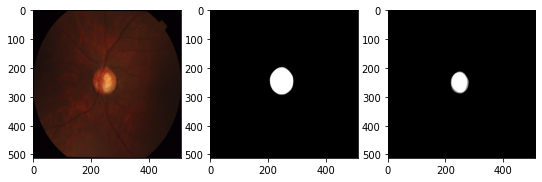

(<HDF5 dataset "images": shape (50, 512, 512, 3), type "|u1">,
 <HDF5 dataset "cup": shape (50, 512, 512, 1), type "|u1">,
 <HDF5 dataset "disc": shape (50, 512, 512, 1), type "|u1">,
 <HDF5 dataset "disc_locations": shape (50, 4), type "<i8">)

In [3]:
fig = plt.figure(figsize=(9, 4))
ax = fig.add_subplot(1, 3, 1)
ax.imshow(np.squeeze(img_train[0]), cmap=plt.cm.Greys_r)
ax = fig.add_subplot(1, 3, 2)
ax.imshow(np.squeeze(disc_train[0]), cmap=plt.cm.Greys_r)
ax = fig.add_subplot(1, 3, 3)
ax.imshow(np.squeeze(cup_train[0]), cmap=plt.cm.Greys_r)
plt.show()

img_train, cup_train, disc_train, disc_locations

#### Generator of augmented data:

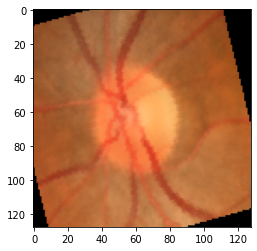

In [4]:
gen = data_generator(img_train, cup_train, disc_locations, 128, 'train', batch_size=1)
batch = next(gen)
plt.imshow(batch[0][0])

In [5]:
img_size = IMG_SIZE

X_test, Y_test = next(data_generator(img_test, cup_test, disc_locations_test, img_size,  train_or_test='test', batch_size=100, stationary=True))
len(X_test), len(Y_test)

(51, 51)

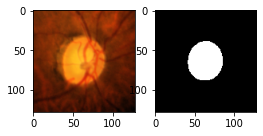

In [6]:
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(1, 2, 1)
ax.imshow(np.squeeze(X_test[10]), cmap=plt.cm.Greys_r)
ax = fig.add_subplot(1, 2, 2)
ax.imshow(np.squeeze(Y_test[10]), cmap=plt.cm.Greys_r)
plt.show()

### Training and testing cup

In [7]:
epochs = NUM_EPOCHS
spe = SPE
model = create_compile_model(img_size)
history_cup = train(img_train, 
                    cup_train, 
                    disc_locations, 
                    'cup_color', 
                    model, epochs, X_test, Y_test, img_size, spe)

Epoch 1/500
99/99 [==============================] - 16s 148ms/step - loss: 1.5460 - mean_IOU_gpu: 0.0331 - dice_metric: 0.0631 - val_loss: 1.4723 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 2/500
99/99 [==============================] - 14s 144ms/step - loss: 1.6153 - mean_IOU_gpu: 5.4268e-04 - dice_metric: 0.0011 - val_loss: 1.4373 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 3/500
99/99 [==============================] - 15s 147ms/step - loss: 1.5134 - mean_IOU_gpu: 0.0000e+00 - dice_metric: 0.0000e+00 - val_loss: 1.4011 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 4/500
99/99 [==============================] - 15s 150ms/step - loss: 1.5019 - mean_IOU_gpu: 0.0000e+00 - dice_metric: 0.0000e+00 - val_loss: 1.3528 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 5/500
99/99 [==============================] - 20s 202ms/step - loss: 1.4173 - mean_IOU_gpu: 0.0000e+00 - dice_metric: 0.0000e+00 - val_loss: 

99/99 [==============================] - 41s 415ms/step - loss: 0.2003 - mean_IOU_gpu: 0.6816 - dice_metric: 0.7992 - val_loss: 0.3303 - val_mean_IOU_gpu: 0.5340 - val_dice_metric: 0.6763
Epoch 42/500
99/99 [==============================] - 39s 397ms/step - loss: 0.1815 - mean_IOU_gpu: 0.6986 - dice_metric: 0.8109 - val_loss: 1.8895 - val_mean_IOU_gpu: 0.0607 - val_dice_metric: 0.0925
Epoch 43/500
99/99 [==============================] - 40s 399ms/step - loss: 0.2213 - mean_IOU_gpu: 0.6567 - dice_metric: 0.7788 - val_loss: 0.6514 - val_mean_IOU_gpu: 0.3270 - val_dice_metric: 0.4388
Epoch 44/500
99/99 [==============================] - 39s 392ms/step - loss: 0.1770 - mean_IOU_gpu: 0.6895 - dice_metric: 0.8090 - val_loss: 1.4994 - val_mean_IOU_gpu: 0.1078 - val_dice_metric: 0.1527
Epoch 45/500
99/99 [==============================] - 40s 405ms/step - loss: 0.2201 - mean_IOU_gpu: 0.6658 - dice_metric: 0.7849 - val_loss: 1.1304 - val_mean_IOU_gpu: 0.1587 - val_dice_metric: 0.2193
Epoch 46

Epoch 82/500
99/99 [==============================] - 40s 402ms/step - loss: 0.1636 - mean_IOU_gpu: 0.7152 - dice_metric: 0.8255 - val_loss: 2.5049 - val_mean_IOU_gpu: 0.0121 - val_dice_metric: 0.0195
Epoch 83/500
99/99 [==============================] - 40s 400ms/step - loss: 0.1755 - mean_IOU_gpu: 0.6943 - dice_metric: 0.8099 - val_loss: 1.5631 - val_mean_IOU_gpu: 0.0707 - val_dice_metric: 0.1065
Epoch 84/500
99/99 [==============================] - 40s 403ms/step - loss: 0.1919 - mean_IOU_gpu: 0.7027 - dice_metric: 0.8093 - val_loss: 1.9190 - val_mean_IOU_gpu: 0.0385 - val_dice_metric: 0.0598
Epoch 85/500
99/99 [==============================] - 40s 400ms/step - loss: 0.1547 - mean_IOU_gpu: 0.7178 - dice_metric: 0.8287 - val_loss: 1.4631 - val_mean_IOU_gpu: 0.0915 - val_dice_metric: 0.1305
Epoch 86/500
99/99 [==============================] - 40s 407ms/step - loss: 0.1726 - mean_IOU_gpu: 0.6990 - dice_metric: 0.8129 - val_loss: 2.2511 - val_mean_IOU_gpu: 0.0154 - val_dice_metric: 0.

Epoch 123/500
99/99 [==============================] - 40s 405ms/step - loss: 0.1783 - mean_IOU_gpu: 0.6893 - dice_metric: 0.8058 - val_loss: 1.2494 - val_mean_IOU_gpu: 0.1243 - val_dice_metric: 0.1791
Epoch 124/500
99/99 [==============================] - 40s 407ms/step - loss: 0.1581 - mean_IOU_gpu: 0.7220 - dice_metric: 0.8296 - val_loss: 1.4602 - val_mean_IOU_gpu: 0.0984 - val_dice_metric: 0.1458
Epoch 125/500
99/99 [==============================] - 39s 395ms/step - loss: 0.1512 - mean_IOU_gpu: 0.7180 - dice_metric: 0.8290 - val_loss: 1.0495 - val_mean_IOU_gpu: 0.1663 - val_dice_metric: 0.2338
Epoch 126/500
99/99 [==============================] - 39s 396ms/step - loss: 0.1311 - mean_IOU_gpu: 0.7563 - dice_metric: 0.8534 - val_loss: 1.2753 - val_mean_IOU_gpu: 0.1107 - val_dice_metric: 0.1640
Epoch 127/500
99/99 [==============================] - 40s 403ms/step - loss: 0.1445 - mean_IOU_gpu: 0.7377 - dice_metric: 0.8403 - val_loss: 1.2744 - val_mean_IOU_gpu: 0.1147 - val_dice_metri

99/99 [==============================] - 39s 396ms/step - loss: 0.1221 - mean_IOU_gpu: 0.7605 - dice_metric: 0.8584 - val_loss: 0.9894 - val_mean_IOU_gpu: 0.2018 - val_dice_metric: 0.2818
Epoch 164/500
99/99 [==============================] - 38s 388ms/step - loss: 0.1278 - mean_IOU_gpu: 0.7524 - dice_metric: 0.8531 - val_loss: 0.7086 - val_mean_IOU_gpu: 0.2941 - val_dice_metric: 0.3911
Epoch 165/500
99/99 [==============================] - 39s 399ms/step - loss: 0.1430 - mean_IOU_gpu: 0.7395 - dice_metric: 0.8423 - val_loss: 1.0990 - val_mean_IOU_gpu: 0.1540 - val_dice_metric: 0.2170
Epoch 166/500
99/99 [==============================] - 39s 396ms/step - loss: 0.1250 - mean_IOU_gpu: 0.7510 - dice_metric: 0.8535 - val_loss: 1.2575 - val_mean_IOU_gpu: 0.1303 - val_dice_metric: 0.1878
Epoch 167/500
99/99 [==============================] - 39s 396ms/step - loss: 0.1210 - mean_IOU_gpu: 0.7553 - dice_metric: 0.8564 - val_loss: 0.3186 - val_mean_IOU_gpu: 0.5195 - val_dice_metric: 0.6363
Epoc

Epoch 204/500
99/99 [==============================] - 39s 390ms/step - loss: 0.1232 - mean_IOU_gpu: 0.7548 - dice_metric: 0.8553 - val_loss: 1.5566 - val_mean_IOU_gpu: 0.0893 - val_dice_metric: 0.1346
Epoch 205/500
99/99 [==============================] - 39s 390ms/step - loss: 0.1207 - mean_IOU_gpu: 0.7583 - dice_metric: 0.8580 - val_loss: 2.3881 - val_mean_IOU_gpu: 0.0185 - val_dice_metric: 0.0295
Epoch 206/500
99/99 [==============================] - 39s 398ms/step - loss: 0.1337 - mean_IOU_gpu: 0.7439 - dice_metric: 0.8460 - val_loss: 0.8296 - val_mean_IOU_gpu: 0.2295 - val_dice_metric: 0.3105
Epoch 207/500
99/99 [==============================] - 39s 396ms/step - loss: 0.1336 - mean_IOU_gpu: 0.7456 - dice_metric: 0.8473 - val_loss: 1.4565 - val_mean_IOU_gpu: 0.0824 - val_dice_metric: 0.1217
Epoch 208/500
99/99 [==============================] - 38s 387ms/step - loss: 0.1419 - mean_IOU_gpu: 0.7359 - dice_metric: 0.8414 - val_loss: 0.1584 - val_mean_IOU_gpu: 0.6873 - val_dice_metri

99/99 [==============================] - 38s 387ms/step - loss: 0.1165 - mean_IOU_gpu: 0.7708 - dice_metric: 0.8650 - val_loss: 1.5361 - val_mean_IOU_gpu: 0.0922 - val_dice_metric: 0.1383
Epoch 245/500
99/99 [==============================] - 38s 386ms/step - loss: 0.1303 - mean_IOU_gpu: 0.7491 - dice_metric: 0.8504 - val_loss: 0.1361 - val_mean_IOU_gpu: 0.7281 - val_dice_metric: 0.8354
Epoch 246/500
99/99 [==============================] - 38s 387ms/step - loss: 0.1271 - mean_IOU_gpu: 0.7512 - dice_metric: 0.8521 - val_loss: 0.4602 - val_mean_IOU_gpu: 0.4311 - val_dice_metric: 0.5458
Epoch 247/500
99/99 [==============================] - 39s 391ms/step - loss: 0.1192 - mean_IOU_gpu: 0.7586 - dice_metric: 0.8594 - val_loss: 0.3104 - val_mean_IOU_gpu: 0.5259 - val_dice_metric: 0.6578
Epoch 248/500
99/99 [==============================] - 39s 392ms/step - loss: 0.1060 - mean_IOU_gpu: 0.7829 - dice_metric: 0.8745 - val_loss: 0.6335 - val_mean_IOU_gpu: 0.3227 - val_dice_metric: 0.4266
Epoc

Epoch 285/500
99/99 [==============================] - 40s 400ms/step - loss: 0.1076 - mean_IOU_gpu: 0.7784 - dice_metric: 0.8715 - val_loss: 0.3982 - val_mean_IOU_gpu: 0.4783 - val_dice_metric: 0.5991
Epoch 286/500
99/99 [==============================] - 39s 398ms/step - loss: 0.1345 - mean_IOU_gpu: 0.7375 - dice_metric: 0.8435 - val_loss: 0.3668 - val_mean_IOU_gpu: 0.4791 - val_dice_metric: 0.6084
Epoch 287/500
99/99 [==============================] - 39s 392ms/step - loss: 0.1066 - mean_IOU_gpu: 0.7776 - dice_metric: 0.8712 - val_loss: 0.6695 - val_mean_IOU_gpu: 0.2963 - val_dice_metric: 0.4045
Epoch 288/500
99/99 [==============================] - 40s 400ms/step - loss: 0.1035 - mean_IOU_gpu: 0.7816 - dice_metric: 0.8746 - val_loss: 1.1482 - val_mean_IOU_gpu: 0.1544 - val_dice_metric: 0.2231
Epoch 289/500
99/99 [==============================] - 40s 404ms/step - loss: 0.1031 - mean_IOU_gpu: 0.7825 - dice_metric: 0.8751 - val_loss: 0.8288 - val_mean_IOU_gpu: 0.2386 - val_dice_metri

99/99 [==============================] - 39s 395ms/step - loss: 0.2189 - mean_IOU_gpu: 0.6570 - dice_metric: 0.7797 - val_loss: 0.1459 - val_mean_IOU_gpu: 0.6985 - val_dice_metric: 0.8153
Epoch 326/500
99/99 [==============================] - 39s 395ms/step - loss: 0.1885 - mean_IOU_gpu: 0.6802 - dice_metric: 0.7994 - val_loss: 0.1464 - val_mean_IOU_gpu: 0.6992 - val_dice_metric: 0.8160
Epoch 327/500
99/99 [==============================] - 39s 393ms/step - loss: 0.1722 - mean_IOU_gpu: 0.6945 - dice_metric: 0.8117 - val_loss: 0.1580 - val_mean_IOU_gpu: 0.6799 - val_dice_metric: 0.8011
Epoch 328/500
99/99 [==============================] - 40s 400ms/step - loss: 0.1655 - mean_IOU_gpu: 0.7061 - dice_metric: 0.8192 - val_loss: 0.1923 - val_mean_IOU_gpu: 0.6388 - val_dice_metric: 0.7657
Epoch 329/500
99/99 [==============================] - 40s 403ms/step - loss: 0.1623 - mean_IOU_gpu: 0.7155 - dice_metric: 0.8235 - val_loss: 0.2693 - val_mean_IOU_gpu: 0.5533 - val_dice_metric: 0.6722
Epoc

Epoch 366/500
99/99 [==============================] - 39s 395ms/step - loss: 0.1071 - mean_IOU_gpu: 0.7799 - dice_metric: 0.8722 - val_loss: 0.6572 - val_mean_IOU_gpu: 0.3244 - val_dice_metric: 0.4268
Epoch 367/500
99/99 [==============================] - 39s 397ms/step - loss: 0.0924 - mean_IOU_gpu: 0.8038 - dice_metric: 0.8878 - val_loss: 0.3025 - val_mean_IOU_gpu: 0.5642 - val_dice_metric: 0.6804
Epoch 368/500
99/99 [==============================] - 39s 394ms/step - loss: 0.1035 - mean_IOU_gpu: 0.7870 - dice_metric: 0.8772 - val_loss: 0.3312 - val_mean_IOU_gpu: 0.5438 - val_dice_metric: 0.6590
Epoch 369/500
99/99 [==============================] - 38s 389ms/step - loss: 0.1097 - mean_IOU_gpu: 0.7753 - dice_metric: 0.8692 - val_loss: 0.3636 - val_mean_IOU_gpu: 0.5173 - val_dice_metric: 0.6353
Epoch 370/500
99/99 [==============================] - 39s 393ms/step - loss: 0.1098 - mean_IOU_gpu: 0.7743 - dice_metric: 0.8691 - val_loss: 0.4287 - val_mean_IOU_gpu: 0.4636 - val_dice_metri

99/99 [==============================] - 39s 390ms/step - loss: 0.0879 - mean_IOU_gpu: 0.8077 - dice_metric: 0.8913 - val_loss: 0.3032 - val_mean_IOU_gpu: 0.5643 - val_dice_metric: 0.6804
Epoch 407/500
99/99 [==============================] - 39s 392ms/step - loss: 0.0957 - mean_IOU_gpu: 0.7940 - dice_metric: 0.8825 - val_loss: 0.6301 - val_mean_IOU_gpu: 0.3372 - val_dice_metric: 0.4355
Epoch 408/500
99/99 [==============================] - 39s 395ms/step - loss: 0.0922 - mean_IOU_gpu: 0.8016 - dice_metric: 0.8865 - val_loss: 0.3441 - val_mean_IOU_gpu: 0.5326 - val_dice_metric: 0.6479
Epoch 409/500
99/99 [==============================] - 38s 386ms/step - loss: 0.0948 - mean_IOU_gpu: 0.8048 - dice_metric: 0.8878 - val_loss: 0.2730 - val_mean_IOU_gpu: 0.5965 - val_dice_metric: 0.7076
Epoch 410/500
99/99 [==============================] - 38s 387ms/step - loss: 0.1106 - mean_IOU_gpu: 0.7872 - dice_metric: 0.8731 - val_loss: 0.1427 - val_mean_IOU_gpu: 0.7386 - val_dice_metric: 0.8303
Epoc

Epoch 447/500
99/99 [==============================] - 39s 394ms/step - loss: 0.0857 - mean_IOU_gpu: 0.8140 - dice_metric: 0.8947 - val_loss: 0.2195 - val_mean_IOU_gpu: 0.6441 - val_dice_metric: 0.7566
Epoch 448/500
99/99 [==============================] - 40s 403ms/step - loss: 0.0966 - mean_IOU_gpu: 0.7941 - dice_metric: 0.8822 - val_loss: 0.2068 - val_mean_IOU_gpu: 0.6567 - val_dice_metric: 0.7652
Epoch 449/500
99/99 [==============================] - 39s 392ms/step - loss: 0.0994 - mean_IOU_gpu: 0.7922 - dice_metric: 0.8808 - val_loss: 0.2492 - val_mean_IOU_gpu: 0.6268 - val_dice_metric: 0.7347
Epoch 450/500
99/99 [==============================] - 39s 394ms/step - loss: 0.1070 - mean_IOU_gpu: 0.7798 - dice_metric: 0.8723 - val_loss: 0.2954 - val_mean_IOU_gpu: 0.5770 - val_dice_metric: 0.6901
Epoch 451/500
99/99 [==============================] - 39s 390ms/step - loss: 0.1384 - mean_IOU_gpu: 0.7491 - dice_metric: 0.8468 - val_loss: 0.1366 - val_mean_IOU_gpu: 0.7176 - val_dice_metri

99/99 [==============================] - 38s 388ms/step - loss: 0.0948 - mean_IOU_gpu: 0.7983 - dice_metric: 0.8851 - val_loss: 0.3840 - val_mean_IOU_gpu: 0.5108 - val_dice_metric: 0.6263
Epoch 488/500
99/99 [==============================] - 39s 394ms/step - loss: 0.1147 - mean_IOU_gpu: 0.7743 - dice_metric: 0.8670 - val_loss: 0.1769 - val_mean_IOU_gpu: 0.6814 - val_dice_metric: 0.7874
Epoch 489/500
99/99 [==============================] - 39s 392ms/step - loss: 0.0934 - mean_IOU_gpu: 0.7979 - dice_metric: 0.8843 - val_loss: 0.1623 - val_mean_IOU_gpu: 0.6997 - val_dice_metric: 0.8006
Epoch 490/500
99/99 [==============================] - 39s 396ms/step - loss: 0.0842 - mean_IOU_gpu: 0.8136 - dice_metric: 0.8949 - val_loss: 0.2059 - val_mean_IOU_gpu: 0.6604 - val_dice_metric: 0.7664
Epoch 491/500
99/99 [==============================] - 39s 395ms/step - loss: 0.0855 - mean_IOU_gpu: 0.8127 - dice_metric: 0.8945 - val_loss: 0.1629 - val_mean_IOU_gpu: 0.6965 - val_dice_metric: 0.8049
Epoc

### Visual check

image #0


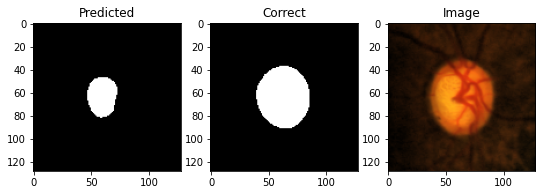

IOU: 0.36798766255378723
Dice: 0.5379984951091046
image #1


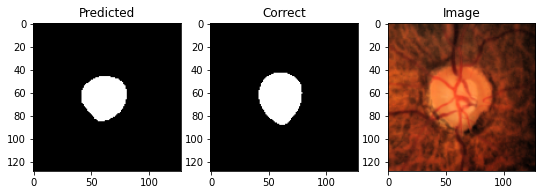

IOU: 0.8581183552742004
Dice: 0.9236423029808085
image #2


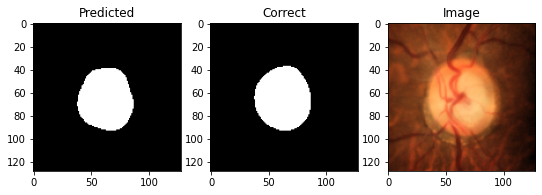

IOU: 0.9356321692466736
Dice: 0.9667458432304038
image #3


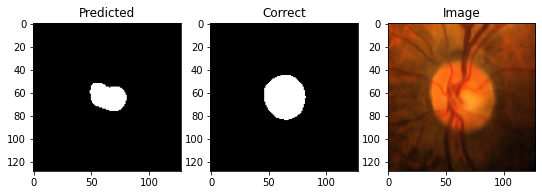

IOU: 0.5378229022026062
Dice: 0.6994601079784043
image #4


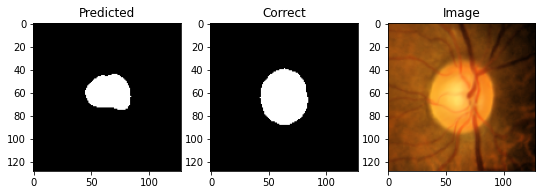

IOU: 0.6079436540603638
Dice: 0.7561752988047808
image #5


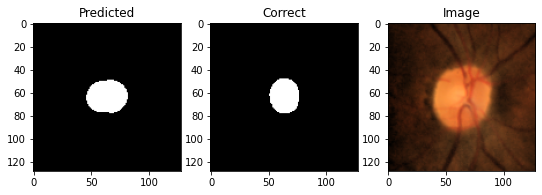

IOU: 0.716152012348175
Dice: 0.8346020761245675
image #6


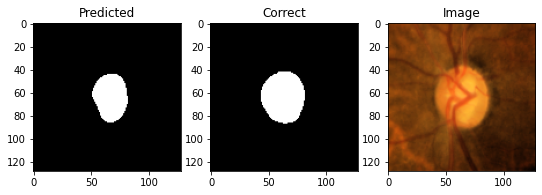

IOU: 0.720653772354126
Dice: 0.8376511226252159
image #7


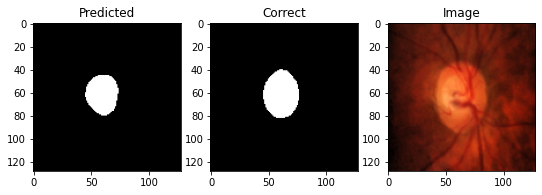

IOU: 0.7574257254600525
Dice: 0.8619718309859155
image #8


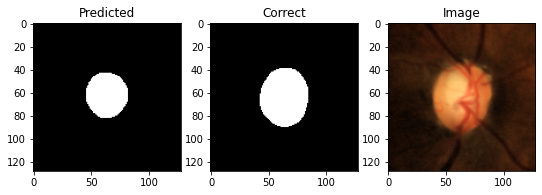

IOU: 0.6635293960571289
Dice: 0.7977369165487977
image #9


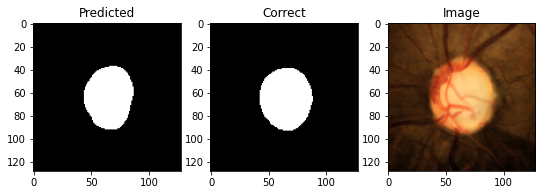

IOU: 0.8978873491287231
Dice: 0.9461966604823747
image #10


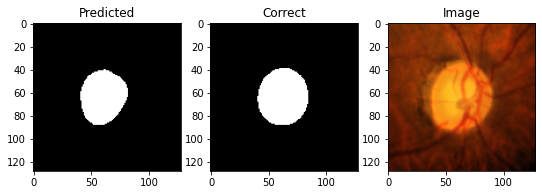

IOU: 0.829994261264801
Dice: 0.9071004066312167
image #11


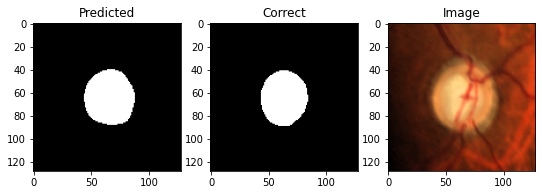

IOU: 0.8582175970077515
Dice: 0.9236997819993772
image #12


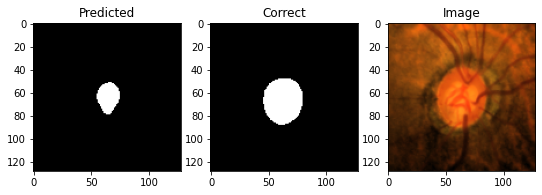

IOU: 0.3661453425884247
Dice: 0.5360269360269361
image #13


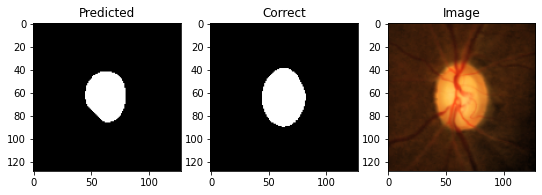

IOU: 0.8121170997619629
Dice: 0.8963185574755823
image #14


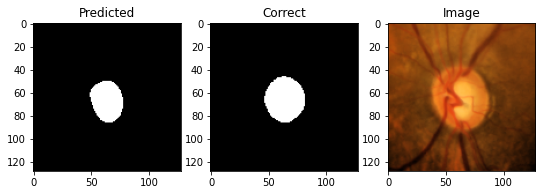

IOU: 0.7443820238113403
Dice: 0.8534621578099839
image #15


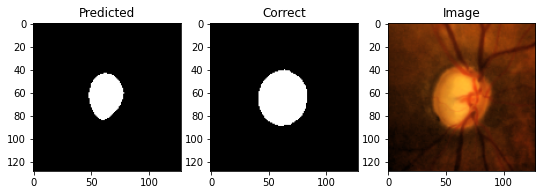

IOU: 0.5646173357963562
Dice: 0.7217321571772254
image #16


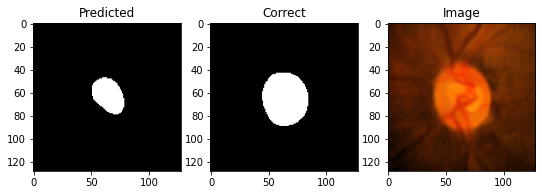

IOU: 0.44081631302833557
Dice: 0.6118980169971672
image #17


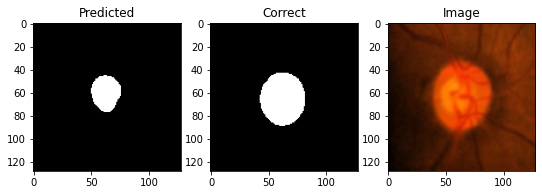

IOU: 0.4386959671974182
Dice: 0.6098522167487684
image #18


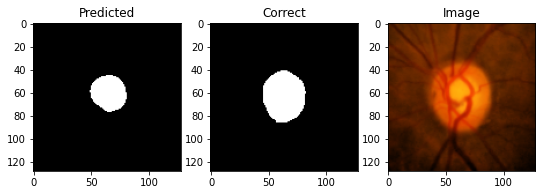

IOU: 0.5910147428512573
Dice: 0.7429406037000974
image #19


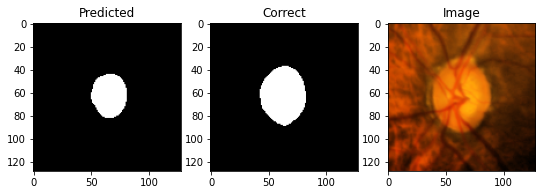

IOU: 0.5954838991165161
Dice: 0.746461787302871
image #20


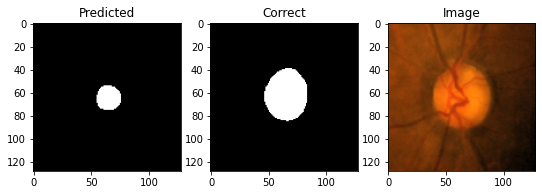

IOU: 0.27832698822021484
Dice: 0.43545508625817964
image #21


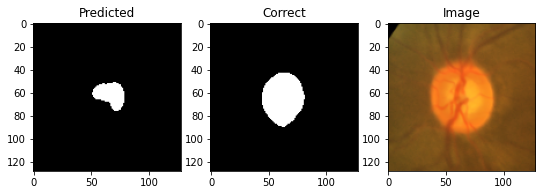

IOU: 0.3538581430912018
Dice: 0.5227403569372481
image #22


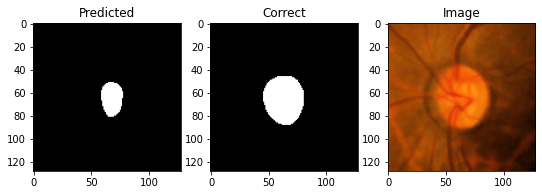

IOU: 0.3798646330833435
Dice: 0.5505824647455548
image #23


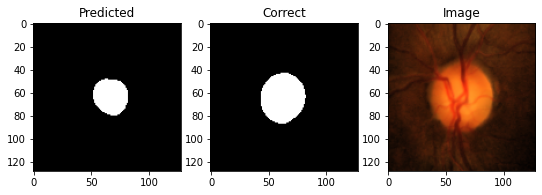

IOU: 0.5728376507759094
Dice: 0.7284129281234926
image #24


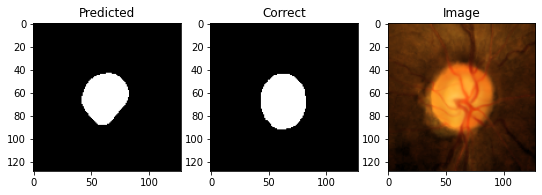

IOU: 0.8029430508613586
Dice: 0.8907026259758695
image #25


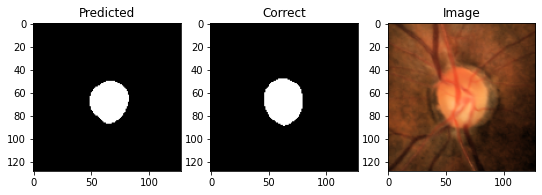

IOU: 0.8063348531723022
Dice: 0.8927855711422845
image #26


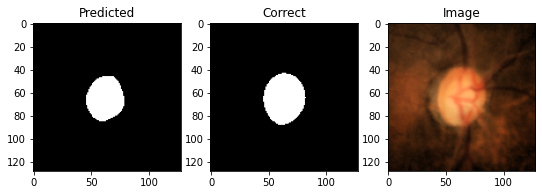

IOU: 0.7937399744987488
Dice: 0.8850111856823266
image #27


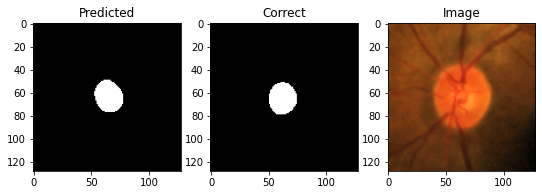

IOU: 0.7038216590881348
Dice: 0.8261682242990654
image #28


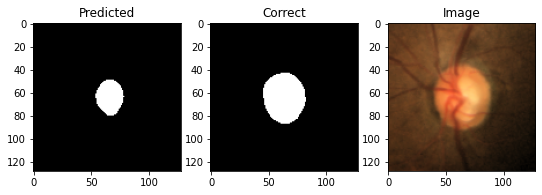

IOU: 0.4492063522338867
Dice: 0.619934282584885
image #29


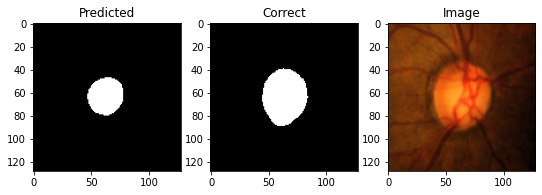

IOU: 0.5388250946998596
Dice: 0.700307152259763
image #30


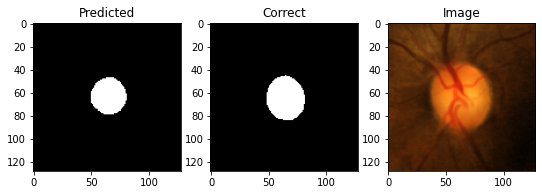

IOU: 0.7717717885971069
Dice: 0.8711864406779661
image #31


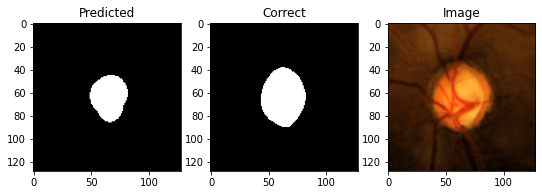

IOU: 0.6542553305625916
Dice: 0.7909967845659164
image #32


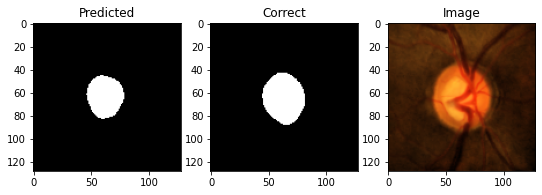

IOU: 0.7385725975036621
Dice: 0.8496309963099631
image #33


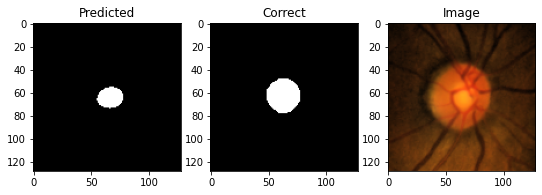

IOU: 0.4736842215061188
Dice: 0.6428571428571429
image #34


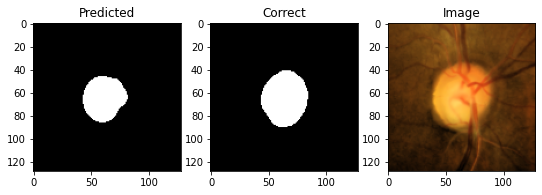

IOU: 0.7222222089767456
Dice: 0.8387096774193549
image #35


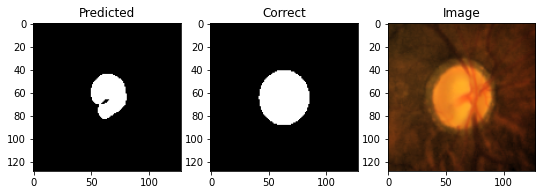

IOU: 0.5319018363952637
Dice: 0.6944333199839807
image #36


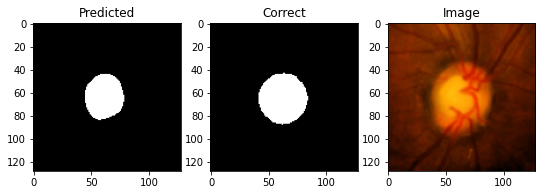

IOU: 0.7263956069946289
Dice: 0.8415169660678643
image #37


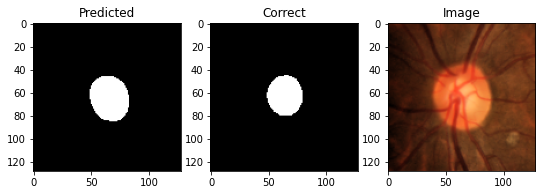

IOU: 0.7889822721481323
Dice: 0.8820459290187892
image #38


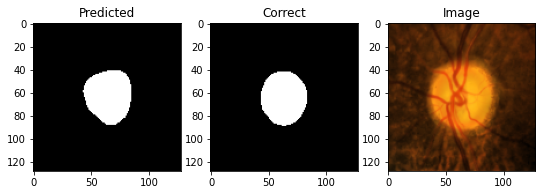

IOU: 0.8560839891433716
Dice: 0.9224625623960067
image #39


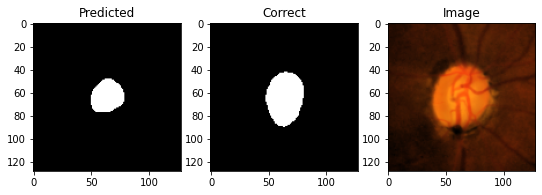

IOU: 0.5515202879905701
Dice: 0.7109417528579205
image #40


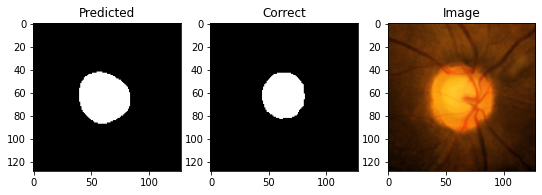

IOU: 0.721446692943573
Dice: 0.838186509399189
image #41


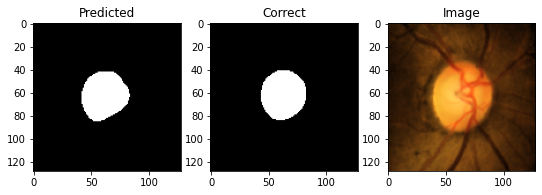

IOU: 0.8708100318908691
Dice: 0.9309443822321762
image #42


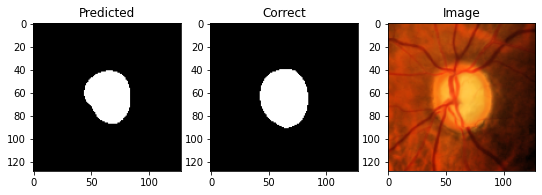

IOU: 0.8415366411209106
Dice: 0.9139504563233377
image #43


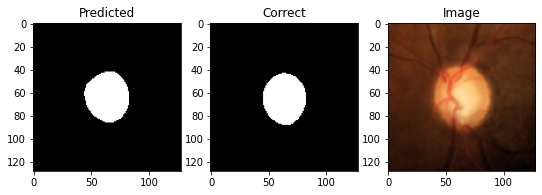

IOU: 0.8988355398178101
Dice: 0.9467228823303948
image #44


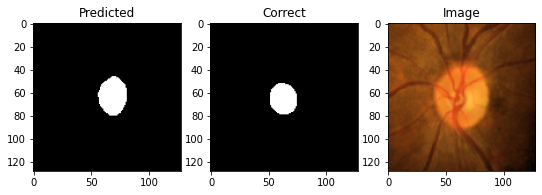

IOU: 0.5118110179901123
Dice: 0.6770833333333334
image #45


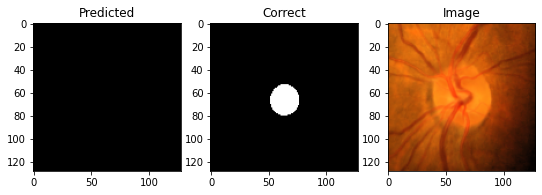

IOU: 0.0
Dice: 0.0
image #46


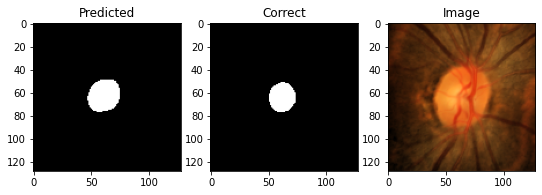

IOU: 0.71875
Dice: 0.8363636363636363
image #47


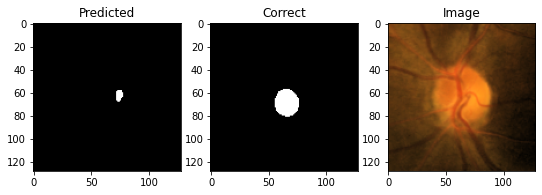

IOU: 0.05450236797332764
Dice: 0.10337078651685393
image #48


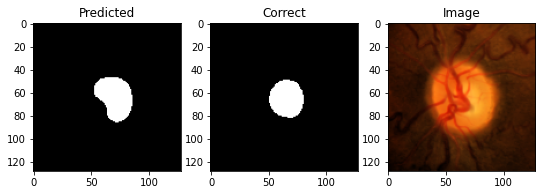

IOU: 0.5902255773544312
Dice: 0.7423167848699763
image #49


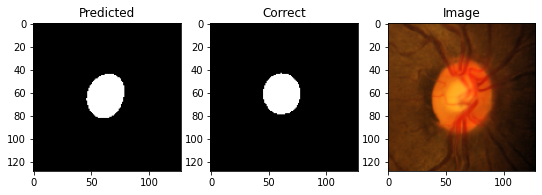

IOU: 0.8317025303840637
Dice: 0.9081196581196581
image #50


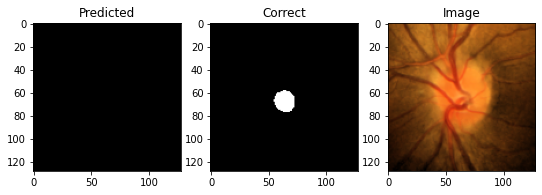

IOU: 0.0
Dice: 0.0


In [8]:
pred_iou, pred_dice, pred_cup = predict(img_test, X_test, Y_test, model, img_size)

In [9]:
print(np.mean(pred_iou))
print(np.mean(pred_dice))

0.62430215
0.7393257481645437


In [10]:
X_test, Z_test = next(data_generator(img_test, disc_test, disc_locations_test, img_size, train_or_test='test', batch_size=100, stationary=True))

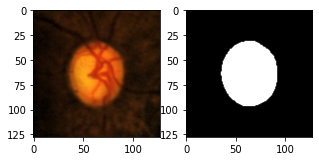

In [11]:
num = 1
for i in range(num):
    fig = plt.figure(figsize=(5, 4))
    ax = fig.add_subplot(1, 2, 1)
    ax.imshow(np.squeeze(X_test[i]), cmap=plt.cm.Greys_r)
    ax = fig.add_subplot(1, 2, 2)
    ax.imshow(np.squeeze(Z_test[i]), cmap=plt.cm.Greys_r)
    plt.show()

In [12]:
model_disc = create_compile_model(img_size)

history_disc = train(img_train, 
                     disc_train, 
                     disc_locations, 
                     'disc_color', 
                     model_disc, epochs, X_test, Z_test, img_size, spe)

Epoch 1/500
99/99 [==============================] - 41s 391ms/step - loss: 0.9978 - mean_IOU_gpu: 0.1606 - dice_metric: 0.2754 - val_loss: 0.9762 - val_mean_IOU_gpu: 0.3482 - val_dice_metric: 0.4947
Epoch 2/500
99/99 [==============================] - 38s 385ms/step - loss: 0.9682 - mean_IOU_gpu: 0.2063 - dice_metric: 0.3391 - val_loss: 0.9283 - val_mean_IOU_gpu: 0.4180 - val_dice_metric: 0.5615
Epoch 3/500
99/99 [==============================] - 39s 393ms/step - loss: 0.9352 - mean_IOU_gpu: 0.2134 - dice_metric: 0.3461 - val_loss: 0.8679 - val_mean_IOU_gpu: 0.5184 - val_dice_metric: 0.6498
Epoch 4/500
99/99 [==============================] - 38s 380ms/step - loss: 0.8889 - mean_IOU_gpu: 0.2381 - dice_metric: 0.3765 - val_loss: 0.7989 - val_mean_IOU_gpu: 0.7410 - val_dice_metric: 0.8338
Epoch 5/500
99/99 [==============================] - 38s 382ms/step - loss: 0.8346 - mean_IOU_gpu: 0.3710 - dice_metric: 0.5098 - val_loss: 0.7302 - val_mean_IOU_gpu: 0.7910 - val_dice_metric: 0.8762


Epoch 42/500
99/99 [==============================] - 40s 400ms/step - loss: 0.0678 - mean_IOU_gpu: 0.8531 - dice_metric: 0.9188 - val_loss: 1.7736 - val_mean_IOU_gpu: 0.0279 - val_dice_metric: 0.0479
Epoch 43/500
99/99 [==============================] - 39s 393ms/step - loss: 0.0765 - mean_IOU_gpu: 0.8388 - dice_metric: 0.9095 - val_loss: 0.8469 - val_mean_IOU_gpu: 0.2027 - val_dice_metric: 0.3111
Epoch 44/500
99/99 [==============================] - 38s 386ms/step - loss: 0.0749 - mean_IOU_gpu: 0.8434 - dice_metric: 0.9117 - val_loss: 1.7622 - val_mean_IOU_gpu: 0.0355 - val_dice_metric: 0.0603
Epoch 45/500
99/99 [==============================] - 40s 402ms/step - loss: 0.0601 - mean_IOU_gpu: 0.8681 - dice_metric: 0.9278 - val_loss: 1.0623 - val_mean_IOU_gpu: 0.1390 - val_dice_metric: 0.2195
Epoch 46/500
99/99 [==============================] - 39s 394ms/step - loss: 0.0638 - mean_IOU_gpu: 0.8608 - dice_metric: 0.9232 - val_loss: 1.1632 - val_mean_IOU_gpu: 0.1228 - val_dice_metric: 0.

Epoch 83/500
99/99 [==============================] - 40s 400ms/step - loss: 0.0576 - mean_IOU_gpu: 0.8695 - dice_metric: 0.9290 - val_loss: 1.0622 - val_mean_IOU_gpu: 0.1577 - val_dice_metric: 0.2438
Epoch 84/500
99/99 [==============================] - 40s 408ms/step - loss: 0.0551 - mean_IOU_gpu: 0.8754 - dice_metric: 0.9325 - val_loss: 1.0432 - val_mean_IOU_gpu: 0.1681 - val_dice_metric: 0.2590
Epoch 85/500
99/99 [==============================] - 40s 400ms/step - loss: 0.0524 - mean_IOU_gpu: 0.8799 - dice_metric: 0.9350 - val_loss: 0.7891 - val_mean_IOU_gpu: 0.2398 - val_dice_metric: 0.3600
Epoch 86/500
99/99 [==============================] - 39s 397ms/step - loss: 0.0640 - mean_IOU_gpu: 0.8583 - dice_metric: 0.9220 - val_loss: 0.9439 - val_mean_IOU_gpu: 0.1843 - val_dice_metric: 0.2836
Epoch 87/500
99/99 [==============================] - 39s 390ms/step - loss: 0.0571 - mean_IOU_gpu: 0.8720 - dice_metric: 0.9301 - val_loss: 0.6960 - val_mean_IOU_gpu: 0.2781 - val_dice_metric: 0.

Epoch 124/500
99/99 [==============================] - 40s 401ms/step - loss: 0.0451 - mean_IOU_gpu: 0.8940 - dice_metric: 0.9434 - val_loss: 0.4378 - val_mean_IOU_gpu: 0.4406 - val_dice_metric: 0.5947
Epoch 125/500
99/99 [==============================] - 39s 397ms/step - loss: 0.0513 - mean_IOU_gpu: 0.8833 - dice_metric: 0.9368 - val_loss: 0.6971 - val_mean_IOU_gpu: 0.2703 - val_dice_metric: 0.3985
Epoch 126/500
99/99 [==============================] - 40s 403ms/step - loss: 0.0487 - mean_IOU_gpu: 0.8873 - dice_metric: 0.9393 - val_loss: 0.7723 - val_mean_IOU_gpu: 0.2391 - val_dice_metric: 0.3584
Epoch 127/500
99/99 [==============================] - 40s 404ms/step - loss: 0.0532 - mean_IOU_gpu: 0.8782 - dice_metric: 0.9340 - val_loss: 0.4519 - val_mean_IOU_gpu: 0.4289 - val_dice_metric: 0.5822
Epoch 128/500
99/99 [==============================] - 40s 406ms/step - loss: 0.0486 - mean_IOU_gpu: 0.8876 - dice_metric: 0.9394 - val_loss: 0.5918 - val_mean_IOU_gpu: 0.3260 - val_dice_metri

99/99 [==============================] - 40s 401ms/step - loss: 0.0436 - mean_IOU_gpu: 0.8988 - dice_metric: 0.9459 - val_loss: 0.7211 - val_mean_IOU_gpu: 0.2616 - val_dice_metric: 0.3864
Epoch 165/500
99/99 [==============================] - 40s 399ms/step - loss: 0.0406 - mean_IOU_gpu: 0.9027 - dice_metric: 0.9483 - val_loss: 0.5418 - val_mean_IOU_gpu: 0.3621 - val_dice_metric: 0.5082
Epoch 166/500
99/99 [==============================] - 42s 422ms/step - loss: 0.0380 - mean_IOU_gpu: 0.9083 - dice_metric: 0.9515 - val_loss: 0.5549 - val_mean_IOU_gpu: 0.3532 - val_dice_metric: 0.4976
Epoch 167/500
99/99 [==============================] - 41s 416ms/step - loss: 0.0391 - mean_IOU_gpu: 0.9067 - dice_metric: 0.9506 - val_loss: 0.8788 - val_mean_IOU_gpu: 0.2043 - val_dice_metric: 0.3092
Epoch 168/500
99/99 [==============================] - 44s 441ms/step - loss: 0.0461 - mean_IOU_gpu: 0.8931 - dice_metric: 0.9426 - val_loss: 0.6009 - val_mean_IOU_gpu: 0.3231 - val_dice_metric: 0.4622
Epoc

Epoch 205/500
99/99 [==============================] - 41s 417ms/step - loss: 0.0410 - mean_IOU_gpu: 0.9022 - dice_metric: 0.9479 - val_loss: 0.4297 - val_mean_IOU_gpu: 0.4470 - val_dice_metric: 0.5975
Epoch 206/500
99/99 [==============================] - 43s 437ms/step - loss: 0.0340 - mean_IOU_gpu: 0.9165 - dice_metric: 0.9562 - val_loss: 0.3044 - val_mean_IOU_gpu: 0.5648 - val_dice_metric: 0.7074
Epoch 207/500
99/99 [==============================] - 42s 425ms/step - loss: 0.0401 - mean_IOU_gpu: 0.9034 - dice_metric: 0.9487 - val_loss: 0.2743 - val_mean_IOU_gpu: 0.5956 - val_dice_metric: 0.7329
Epoch 208/500
99/99 [==============================] - 43s 435ms/step - loss: 0.0365 - mean_IOU_gpu: 0.9116 - dice_metric: 0.9535 - val_loss: 0.3524 - val_mean_IOU_gpu: 0.5148 - val_dice_metric: 0.6625
Epoch 209/500
99/99 [==============================] - 42s 424ms/step - loss: 0.0368 - mean_IOU_gpu: 0.9115 - dice_metric: 0.9531 - val_loss: 0.4119 - val_mean_IOU_gpu: 0.4609 - val_dice_metri

99/99 [==============================] - 43s 432ms/step - loss: 0.0361 - mean_IOU_gpu: 0.9120 - dice_metric: 0.9537 - val_loss: 0.2677 - val_mean_IOU_gpu: 0.6036 - val_dice_metric: 0.7383
Epoch 246/500
99/99 [==============================] - 42s 420ms/step - loss: 0.0380 - mean_IOU_gpu: 0.9090 - dice_metric: 0.9518 - val_loss: 0.3325 - val_mean_IOU_gpu: 0.5346 - val_dice_metric: 0.6793
Epoch 247/500
99/99 [==============================] - 42s 424ms/step - loss: 0.0370 - mean_IOU_gpu: 0.9103 - dice_metric: 0.9526 - val_loss: 0.2384 - val_mean_IOU_gpu: 0.6349 - val_dice_metric: 0.7633
Epoch 248/500
99/99 [==============================] - 42s 425ms/step - loss: 0.0366 - mean_IOU_gpu: 0.9119 - dice_metric: 0.9534 - val_loss: 0.3468 - val_mean_IOU_gpu: 0.5200 - val_dice_metric: 0.6652
Epoch 249/500
99/99 [==============================] - 42s 420ms/step - loss: 0.0448 - mean_IOU_gpu: 0.8941 - dice_metric: 0.9433 - val_loss: 0.5448 - val_mean_IOU_gpu: 0.3569 - val_dice_metric: 0.4961
Epoc

Epoch 286/500
99/99 [==============================] - 41s 417ms/step - loss: 0.0412 - mean_IOU_gpu: 0.9024 - dice_metric: 0.9480 - val_loss: 0.2592 - val_mean_IOU_gpu: 0.6099 - val_dice_metric: 0.7430
Epoch 287/500
99/99 [==============================] - 42s 422ms/step - loss: 0.0332 - mean_IOU_gpu: 0.9181 - dice_metric: 0.9569 - val_loss: 0.2262 - val_mean_IOU_gpu: 0.6486 - val_dice_metric: 0.7735
Epoch 288/500
99/99 [==============================] - 41s 418ms/step - loss: 0.0362 - mean_IOU_gpu: 0.9120 - dice_metric: 0.9534 - val_loss: 0.2619 - val_mean_IOU_gpu: 0.6089 - val_dice_metric: 0.7419
Epoch 289/500
99/99 [==============================] - 43s 433ms/step - loss: 0.0373 - mean_IOU_gpu: 0.9101 - dice_metric: 0.9525 - val_loss: 0.3371 - val_mean_IOU_gpu: 0.5289 - val_dice_metric: 0.6723
Epoch 290/500
99/99 [==============================] - 43s 430ms/step - loss: 0.0402 - mean_IOU_gpu: 0.9035 - dice_metric: 0.9487 - val_loss: 0.2446 - val_mean_IOU_gpu: 0.6263 - val_dice_metri

99/99 [==============================] - 42s 428ms/step - loss: 0.0377 - mean_IOU_gpu: 0.9088 - dice_metric: 0.9516 - val_loss: 0.1656 - val_mean_IOU_gpu: 0.7206 - val_dice_metric: 0.8289
Epoch 327/500
99/99 [==============================] - 41s 419ms/step - loss: 0.0360 - mean_IOU_gpu: 0.9131 - dice_metric: 0.9540 - val_loss: 0.2031 - val_mean_IOU_gpu: 0.6726 - val_dice_metric: 0.7924
Epoch 328/500
99/99 [==============================] - 42s 421ms/step - loss: 0.0351 - mean_IOU_gpu: 0.9149 - dice_metric: 0.9551 - val_loss: 0.2430 - val_mean_IOU_gpu: 0.6270 - val_dice_metric: 0.7561
Epoch 329/500
99/99 [==============================] - 41s 420ms/step - loss: 0.0331 - mean_IOU_gpu: 0.9178 - dice_metric: 0.9569 - val_loss: 0.1780 - val_mean_IOU_gpu: 0.7047 - val_dice_metric: 0.8170
Epoch 330/500
99/99 [==============================] - 42s 425ms/step - loss: 0.0374 - mean_IOU_gpu: 0.9095 - dice_metric: 0.9520 - val_loss: 0.2397 - val_mean_IOU_gpu: 0.6305 - val_dice_metric: 0.7584
Epoc

Epoch 367/500
99/99 [==============================] - 41s 418ms/step - loss: 0.0347 - mean_IOU_gpu: 0.9149 - dice_metric: 0.9552 - val_loss: 0.1470 - val_mean_IOU_gpu: 0.7457 - val_dice_metric: 0.8459
Epoch 368/500
99/99 [==============================] - 41s 419ms/step - loss: 0.0317 - mean_IOU_gpu: 0.9213 - dice_metric: 0.9588 - val_loss: 0.1472 - val_mean_IOU_gpu: 0.7457 - val_dice_metric: 0.8459
Epoch 369/500
99/99 [==============================] - 41s 416ms/step - loss: 0.0344 - mean_IOU_gpu: 0.9156 - dice_metric: 0.9556 - val_loss: 0.1659 - val_mean_IOU_gpu: 0.7220 - val_dice_metric: 0.8278
Epoch 370/500
99/99 [==============================] - 42s 424ms/step - loss: 0.0331 - mean_IOU_gpu: 0.9183 - dice_metric: 0.9572 - val_loss: 0.1760 - val_mean_IOU_gpu: 0.7088 - val_dice_metric: 0.8178
Epoch 371/500
99/99 [==============================] - 42s 422ms/step - loss: 0.0323 - mean_IOU_gpu: 0.9204 - dice_metric: 0.9582 - val_loss: 0.2289 - val_mean_IOU_gpu: 0.6466 - val_dice_metri

99/99 [==============================] - 42s 426ms/step - loss: 0.0357 - mean_IOU_gpu: 0.9125 - dice_metric: 0.9539 - val_loss: 0.1612 - val_mean_IOU_gpu: 0.7253 - val_dice_metric: 0.8324
Epoch 408/500
99/99 [==============================] - 42s 422ms/step - loss: 0.0356 - mean_IOU_gpu: 0.9130 - dice_metric: 0.9541 - val_loss: 0.1858 - val_mean_IOU_gpu: 0.6948 - val_dice_metric: 0.8084
Epoch 409/500
99/99 [==============================] - 42s 424ms/step - loss: 0.0330 - mean_IOU_gpu: 0.9188 - dice_metric: 0.9574 - val_loss: 0.1748 - val_mean_IOU_gpu: 0.7086 - val_dice_metric: 0.8192
Epoch 410/500
99/99 [==============================] - 42s 420ms/step - loss: 0.0341 - mean_IOU_gpu: 0.9160 - dice_metric: 0.9559 - val_loss: 0.2429 - val_mean_IOU_gpu: 0.6228 - val_dice_metric: 0.7514
Epoch 411/500
99/99 [==============================] - 43s 429ms/step - loss: 0.0347 - mean_IOU_gpu: 0.9148 - dice_metric: 0.9552 - val_loss: 0.1448 - val_mean_IOU_gpu: 0.7468 - val_dice_metric: 0.8479
Epoc

Epoch 448/500
99/99 [==============================] - 42s 424ms/step - loss: 0.0335 - mean_IOU_gpu: 0.9175 - dice_metric: 0.9566 - val_loss: 0.1561 - val_mean_IOU_gpu: 0.7342 - val_dice_metric: 0.8364
Epoch 449/500
99/99 [==============================] - 42s 425ms/step - loss: 0.0324 - mean_IOU_gpu: 0.9205 - dice_metric: 0.9583 - val_loss: 0.2017 - val_mean_IOU_gpu: 0.6774 - val_dice_metric: 0.7934
Epoch 450/500
99/99 [==============================] - 41s 417ms/step - loss: 0.0336 - mean_IOU_gpu: 0.9168 - dice_metric: 0.9564 - val_loss: 0.1428 - val_mean_IOU_gpu: 0.7512 - val_dice_metric: 0.8495
Epoch 451/500
99/99 [==============================] - 42s 426ms/step - loss: 0.0307 - mean_IOU_gpu: 0.9238 - dice_metric: 0.9601 - val_loss: 0.1493 - val_mean_IOU_gpu: 0.7428 - val_dice_metric: 0.8435
Epoch 452/500
99/99 [==============================] - 43s 432ms/step - loss: 0.0334 - mean_IOU_gpu: 0.9179 - dice_metric: 0.9568 - val_loss: 0.1475 - val_mean_IOU_gpu: 0.7443 - val_dice_metri

99/99 [==============================] - 43s 431ms/step - loss: 0.0371 - mean_IOU_gpu: 0.9107 - dice_metric: 0.9527 - val_loss: 0.1672 - val_mean_IOU_gpu: 0.7193 - val_dice_metric: 0.8252
Epoch 489/500
99/99 [==============================] - 42s 425ms/step - loss: 0.0338 - mean_IOU_gpu: 0.9163 - dice_metric: 0.9560 - val_loss: 0.1755 - val_mean_IOU_gpu: 0.7102 - val_dice_metric: 0.8176
Epoch 490/500
99/99 [==============================] - 43s 430ms/step - loss: 0.0328 - mean_IOU_gpu: 0.9190 - dice_metric: 0.9575 - val_loss: 0.1311 - val_mean_IOU_gpu: 0.7675 - val_dice_metric: 0.8604
Epoch 491/500
99/99 [==============================] - 41s 416ms/step - loss: 0.0337 - mean_IOU_gpu: 0.9183 - dice_metric: 0.9569 - val_loss: 0.1776 - val_mean_IOU_gpu: 0.7085 - val_dice_metric: 0.8164
Epoch 492/500
99/99 [==============================] - 42s 425ms/step - loss: 0.0323 - mean_IOU_gpu: 0.9197 - dice_metric: 0.9579 - val_loss: 0.1749 - val_mean_IOU_gpu: 0.7120 - val_dice_metric: 0.8192
Epoc

image #0


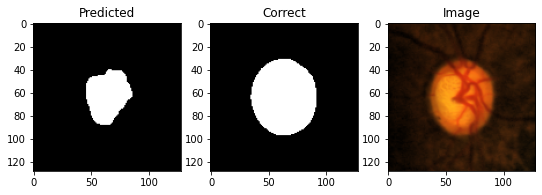

IOU: 0.4612010717391968
Dice: 0.6312629877626414
image #1


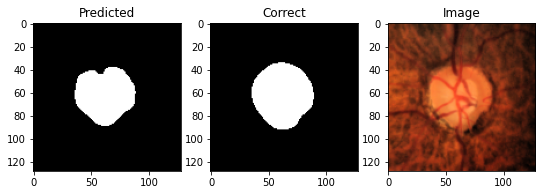

IOU: 0.8484978675842285
Dice: 0.9180403993498956
image #2


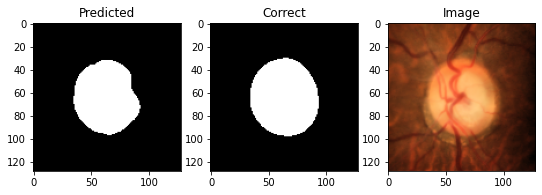

IOU: 0.8884652256965637
Dice: 0.9409389197375063
image #3


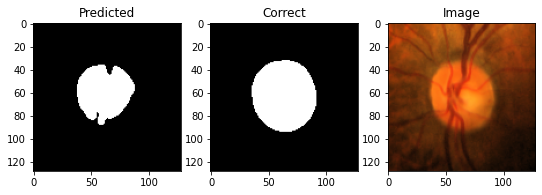

IOU: 0.6690935492515564
Dice: 0.8017448200654308
image #4


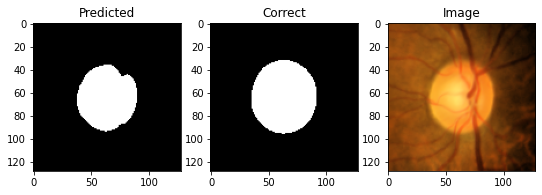

IOU: 0.7976776957511902
Dice: 0.8874535134077118
image #5


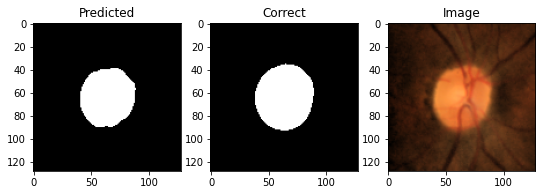

IOU: 0.8452120423316956
Dice: 0.9161137440758294
image #6


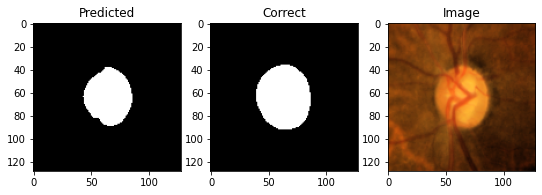

IOU: 0.7537134885787964
Dice: 0.8595628415300547
image #7


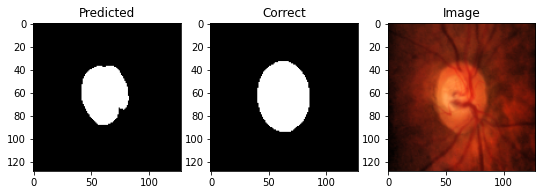

IOU: 0.7346470952033997
Dice: 0.8470277410832232
image #8


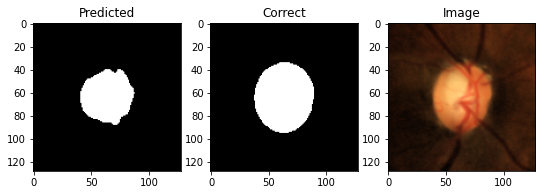

IOU: 0.672623872756958
Dice: 0.804273919378339
image #9


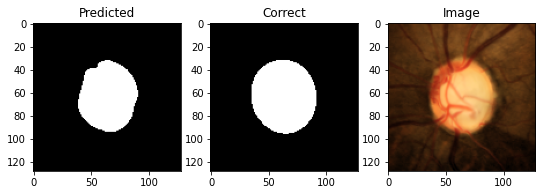

IOU: 0.8508248329162598
Dice: 0.9194007206523801
image #10


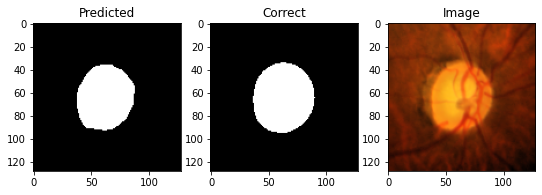

IOU: 0.873338520526886
Dice: 0.9323873121869783
image #11


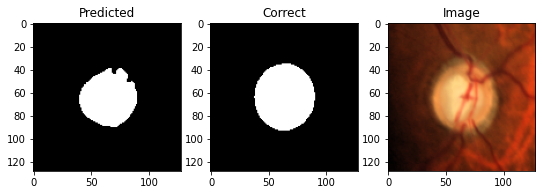

IOU: 0.7897176742553711
Dice: 0.882505297857311
image #12


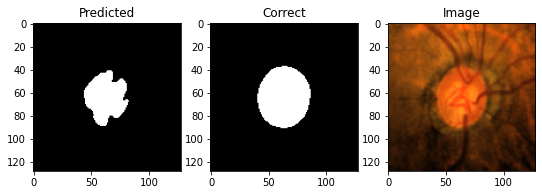

IOU: 0.6309214234352112
Dice: 0.7736993297159273
image #13


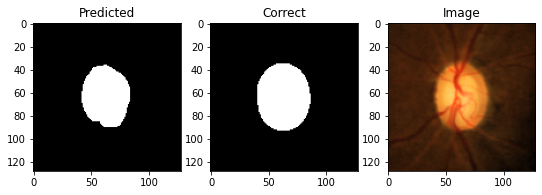

IOU: 0.8115741014480591
Dice: 0.8959877331970355
image #14


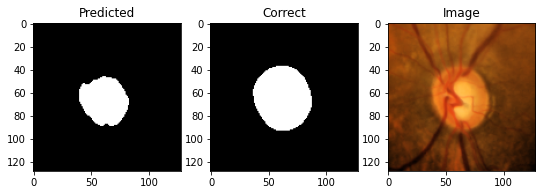

IOU: 0.6217687129974365
Dice: 0.7667785234899329
image #15


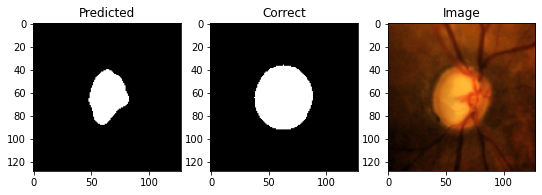

IOU: 0.5054844617843628
Dice: 0.6715239829993929
image #16


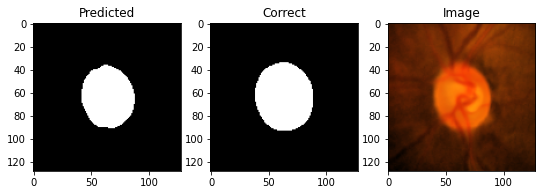

IOU: 0.8215644955635071
Dice: 0.9020427112349118
image #17


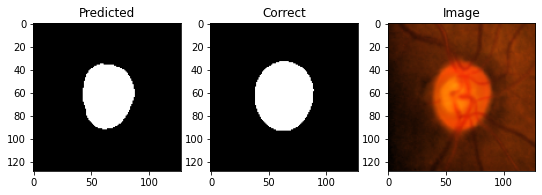

IOU: 0.8248023390769958
Dice: 0.9039908779931585
image #18


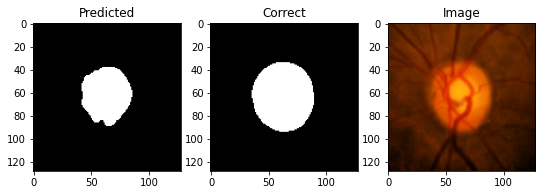

IOU: 0.6597331166267395
Dice: 0.794986994561362
image #19


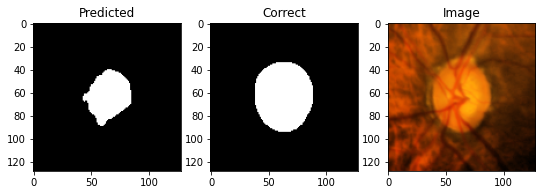

IOU: 0.5346737504005432
Dice: 0.6967914438502674
image #20


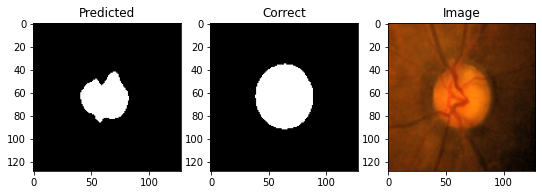

IOU: 0.5455782413482666
Dice: 0.7059859154929577
image #21


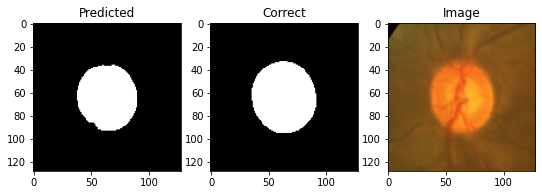

IOU: 0.8548446297645569
Dice: 0.9217425586438005
image #22


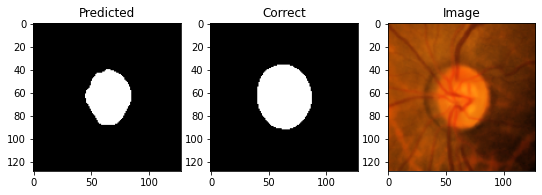

IOU: 0.6720997095108032
Dice: 0.8038990825688074
image #23


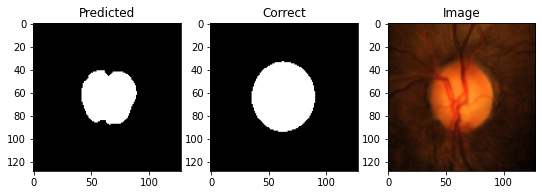

IOU: 0.6813271641731262
Dice: 0.8104635153740248
image #24


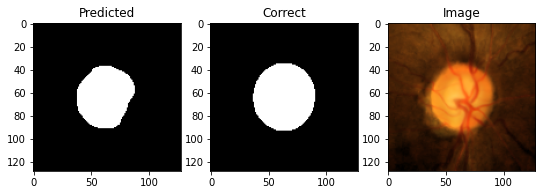

IOU: 0.8258766531944275
Dice: 0.904635761589404
image #25


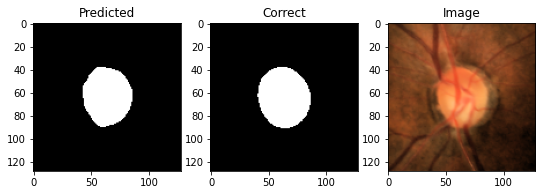

IOU: 0.8994709253311157
Dice: 0.947075208913649
image #26


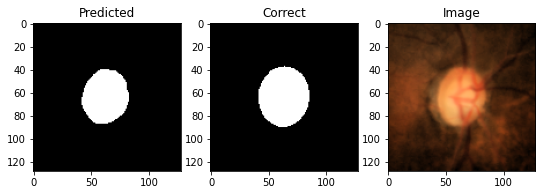

IOU: 0.82356196641922
Dice: 0.9032453745829542
image #27


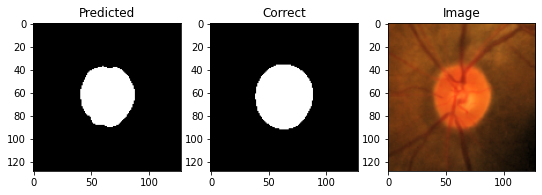

IOU: 0.8711879849433899
Dice: 0.9311603016297738
image #28


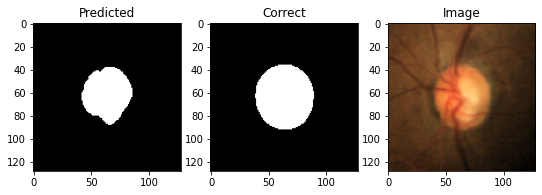

IOU: 0.6922735571861267
Dice: 0.8181579637890317
image #29


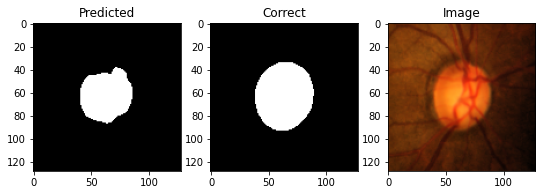

IOU: 0.6904560923576355
Dice: 0.8168873344991257
image #30


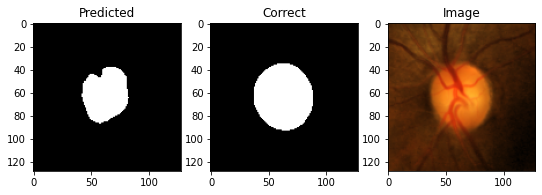

IOU: 0.6286938190460205
Dice: 0.772022087825401
image #31


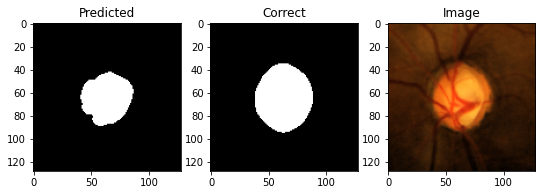

IOU: 0.6795604228973389
Dice: 0.809212248102591
image #32


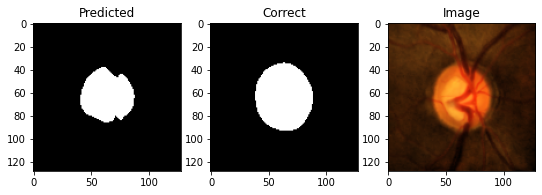

IOU: 0.7121739387512207
Dice: 0.8318943626206196
image #33


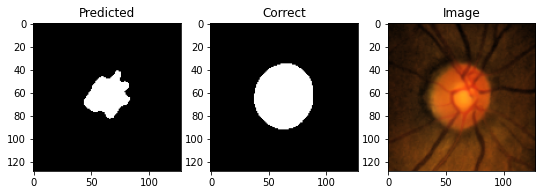

IOU: 0.4326334297657013
Dice: 0.603969465648855
image #34


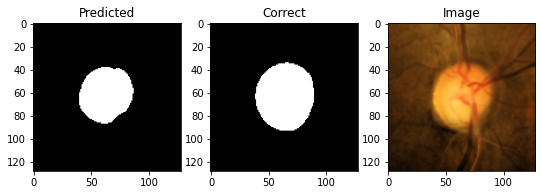

IOU: 0.7470288872718811
Dice: 0.8551992225461613
image #35


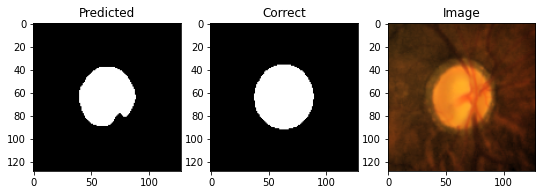

IOU: 0.8325210213661194
Dice: 0.9086073500967118
image #36


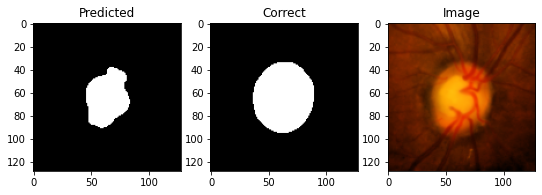

IOU: 0.5621812343597412
Dice: 0.7197388247112004
image #37


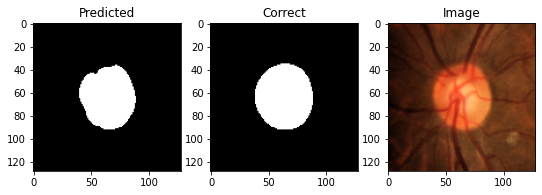

IOU: 0.9084909558296204
Dice: 0.9520516366989396
image #38


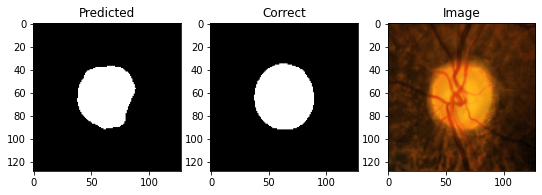

IOU: 0.8904518485069275
Dice: 0.9420518602029312
image #39


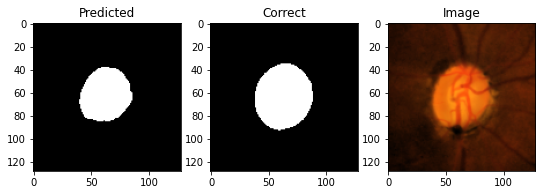

IOU: 0.7403759956359863
Dice: 0.8508230452674898
image #40


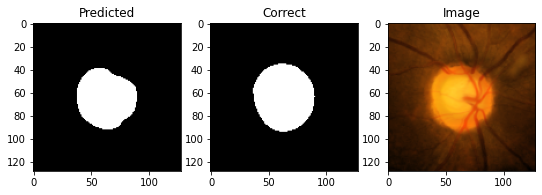

IOU: 0.8536885380744934
Dice: 0.9210700862259562
image #41


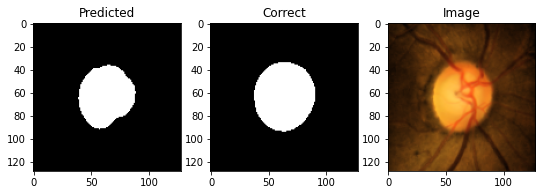

IOU: 0.8071802854537964
Dice: 0.8933035714285714
image #42


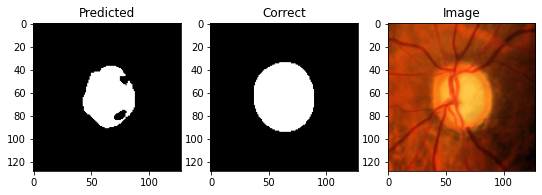

IOU: 0.6734287738800049
Dice: 0.8048490610886617
image #43


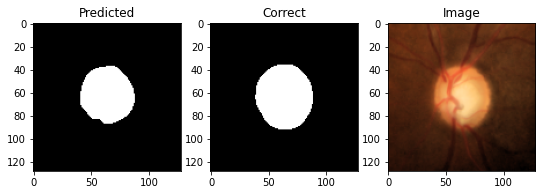

IOU: 0.8225952982902527
Dice: 0.9026636793627085
image #44


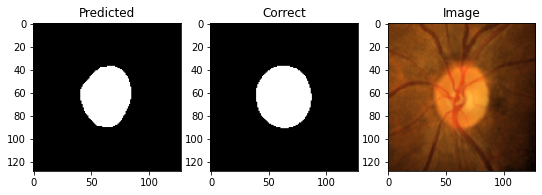

IOU: 0.8680351972579956
Dice: 0.9293563579277865
image #45


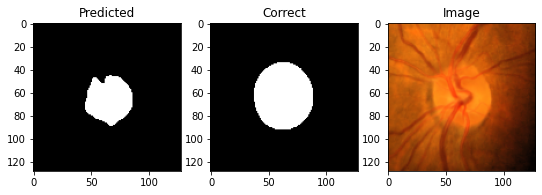

IOU: 0.5549936890602112
Dice: 0.7138211382113822
image #46


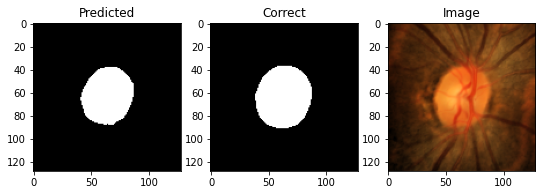

IOU: 0.843137264251709
Dice: 0.9148936170212766
image #47


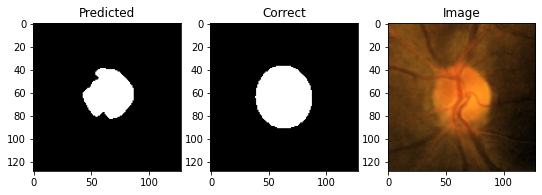

IOU: 0.6488549709320068
Dice: 0.7870370370370371
image #48


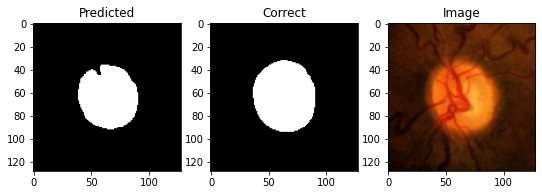

IOU: 0.845461368560791
Dice: 0.916260162601626
image #49


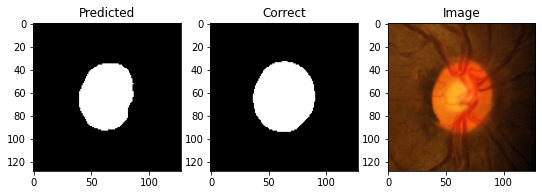

IOU: 0.8431525826454163
Dice: 0.9149026248941575
image #50


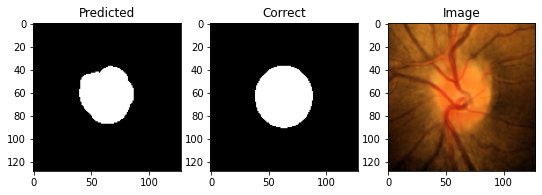

IOU: 0.8301975727081299
Dice: 0.9072217938833205


In [13]:
pred_iou, pred_dice, pred_disc = predict(img_test, X_test, Z_test, model_disc, img_size)

In [14]:
print(np.mean(pred_iou))
print(np.mean(pred_dice))

0.7426872
0.8462885502865923


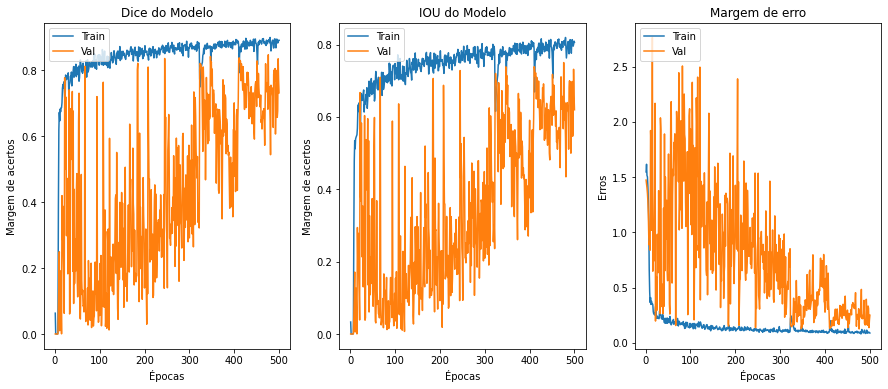

In [35]:
plot_results(history_cup, epochs)

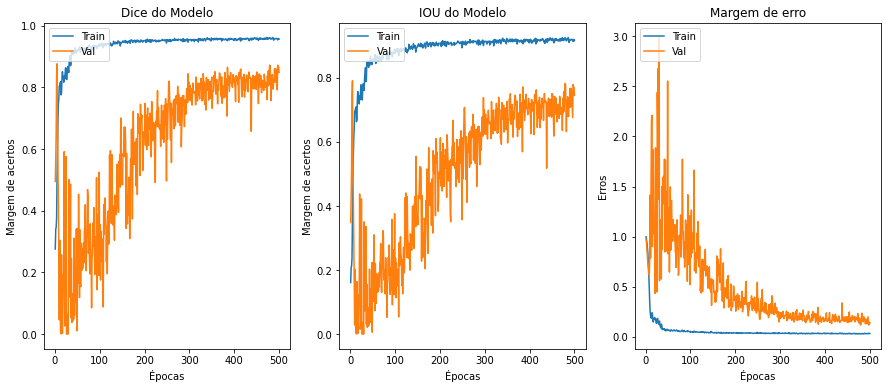

In [36]:
plot_results(history_disc, epochs)

In [32]:
result, diametros_cup, diametros_disc = create_table_result(pred_cup, pred_disc, test_idx)

image #0 - cdr = 0.7470023275369723
image #1 - cdr = 0.7519439545236892
image #2 - cdr = 0.8525885053294816
image #3 - cdr = 0.6820354376966566
image #4 - cdr = 0.7269247171152786
image #5 - cdr = 0.6920152903255096
image #6 - cdr = 0.8682633478067697
image #7 - cdr = 0.6924794094015534
image #8 - cdr = 0.8316433864018424
image #9 - cdr = 0.9090025262796001
image #10 - cdr = 0.8207059297850945
image #11 - cdr = 0.9631430954514442
image #12 - cdr = 0.6145789466192517
image #13 - cdr = 0.8237520837257957
image #14 - cdr = 0.8262072654242086
image #15 - cdr = 0.872459797546316
image #16 - cdr = 0.6425994703851675
image #17 - cdr = 0.553388572309217
image #18 - cdr = 0.6543981327985318
image #19 - cdr = 0.8230509078850742
image #20 - cdr = 0.5176569789068785
image #21 - cdr = 0.5121417955538317
image #22 - cdr = 0.6496629667697571
image #23 - cdr = 0.6734320198446164
image #24 - cdr = 0.8146295499849204
image #25 - cdr = 0.7071793264749393
image #26 - cdr = 0.8197387426071483
image #27 - c

In [33]:
pd.DataFrame(data= result)

cdr      area
0   0.747002  0.523043
1   0.751944  0.587110
2   0.852589  0.741059
3   0.682035  0.317193
4   0.726925  0.420820
5   0.692015  0.424728
6   0.868263  0.620470
7   0.692479  0.482845
8   0.831643  0.681159
9   0.909003  0.757013
10  0.820706  0.662198
11  0.963143  0.892209
12  0.614579  0.328383
13  0.823752  0.681118
14  0.826207  0.579869
15  0.872460  0.813743
16  0.642599  0.333505
17  0.553389  0.312311
18  0.654398  0.453896
19  0.823051  0.708365
20  0.517657  0.304239
21  0.512142  0.194183
22  0.649663  0.320257
23  0.673432  0.427520
24  0.814630  0.645193
25  0.707179  0.550292
26  0.819739  0.667114
27  0.551280  0.280564
28  0.647697  0.363053
29  0.684267  0.488073
30  0.662337  0.525204
31  0.867062  0.636481
32  0.785398  0.562271
33  0.558374  0.327604
34  0.804072  0.655682
35  0.742085  0.461416
36  0.771486  0.735520
37  0.738946  0.515254
38  0.855237  0.727099
39  0.634312  0.394800
40  0.857163  0.735687
41  0.811152  0.675162
42  0.876219  0.828116
43  0.884465  0.725869
44  0.629392  0.360112
45  0.000000  0.000000
46  0.595340  0.357913
47  0.237297  0.035294
48  0.752585  0.406832
49  0.657195  0.450255
50  0.000000  0.000000

In [34]:
cup = np.array(diametros_cup)
disc = np.array(diametros_disc)
pd.DataFrame(data={'cup - dm': cup[:,0], 'cup - dM': cup[:,1], 'disc - dm': disc[:,0], 'disc - dM': disc[:,1]})

cup - dm   cup - dM  disc - dm  disc - dM
0   25.904879  35.744465  38.087440  47.850540
1   38.028858  39.782440  49.392731  52.906124
2   48.215427  55.281582  55.741852  64.839699
3   22.287973  34.548374  47.796814  50.654808
4   30.656507  40.738262  52.022987  56.041927
5   28.945906  36.342194  47.256615  52.516460
6   29.559666  42.597057  41.408573  49.060066
7   28.266201  35.405575  40.393375  51.128704
8   36.448460  39.660847  45.039913  47.689728
9   42.332584  55.715176  50.802624  61.292652
10  39.949150  47.896111  49.224468  58.359650
11  44.036961  48.604462  47.981445  50.464424
12  19.263617  27.011456  36.856911  43.951157
13  34.996033  44.170815  41.966080  53.621490
14  27.659290  36.993561  39.890358  44.775158
15  29.401859  39.806458  32.354958  45.625549
16  24.127483  34.955360  45.696407  54.396809
17  25.426546  31.559750  44.748810  57.029999
18  30.092117  32.676880  43.691601  49.934250
19  30.780457  38.431316  37.164360  46.693729
20  21.639502  21.738665  38.678364  41.994343
21  21.712601  29.495108  51.882782  57.591682
22  18.974304  30.677118  38.228016  47.220051
23  29.783852  32.652115  47.342995  48.486134
24  38.124741  45.275154  47.751244  55.577599
25  33.472443  36.439728  42.768711  51.528271
26  32.636150  39.238075  39.927753  47.866562
27  23.909456  28.910337  46.800873  52.442184
28  23.730310  30.944529  42.573456  47.776218
29  30.586435  33.457302  43.448372  48.895073
30  30.979643  31.955648  39.551243  48.246815
31  31.957760  40.322327  42.943573  46.504551
32  31.904169  37.209854  44.896236  47.377068
33  18.203196  22.712402  33.409935  40.675995
34  36.930195  40.662266  44.714321  50.570438
35  30.186665  38.418449  47.124752  51.770939
36  34.037369  39.842842  36.748932  51.644276
37  33.407730  40.735428  48.203251  55.126408
38  41.616505  47.664841  48.822937  55.732903
39  27.255411  31.209110  43.298721  49.201481
40  42.851135  46.335815  50.244438  54.057178
41  39.634178  44.438469  47.450962  54.784401
42  38.883087  46.632328  40.198147  53.219952
43  38.378773  44.097187  46.793095  49.857456
44  24.583471  33.496925  43.122898  53.221085
45   0.000000   0.000000   0.000000   0.000000
46  26.273312  30.739044  43.785255  51.632748
47   6.255881  10.264971  41.604465  43.257870
48  29.654783  41.793697  51.843781  55.533508
49  31.508379  39.483124  46.153149  60.078262
50   0.000000   0.000000   0.000000   0.000000